#Introduction:

This Data Science prject aims to provide analysis of supermarket data through some questions.Here we have discussed basic topics of exploratory data analysis using Python that is by using graphs which is very helpful in examining the preliminary data analysis.
The Following are the questions related to the Data

##Installing required libraries

We start by installing the required libraries like NumPy, Pandas, Matplotlib, Seaborn and Datetime

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import time

##Readig the uploaded file
We read the files using pandas

In [2]:
S = pd.read_excel("Supermarket.xlsx")
S1 = pd.read_excel('Supermarket.xlsx', sheet_name="CITY Mapping")
S2 = pd.read_excel('Supermarket.xlsx', sheet_name="product Mapping")
print(S.head(),'\n',S1.head(),'\n',S2.head())

    Invoice ID Branch CITY CODE Customer type  Gender Product code Unit price  \
0  750-67-8428      A       CT1        Member  Female          PD1      74.69   
1  226-31-3081      C       CT3        Normal  Female          PD2      15.28   
2  631-41-3108      A       CT1        Normal    Male          PD3      46.33   
3  123-19-1176      A       CT1        Member    Male          PD1      58.22   
4  373-73-7910      A       CT1        Normal    Male          PD4      86.31   

   Quantity   Tax 5%     Total       Date      Time      Payment    cogs  \
0         7  26.1415  548.9715 2019-01-05  13:08:00      Ewallet  522.83   
1         5   3.8200   80.2200 2019-03-08  10:29:00         Cash   76.40   
2         7  16.2155  340.5255 2019-03-03  13:23:00  Credit card  324.31   
3         8  23.2880  489.0480 2019-01-27  20:33:00      Ewallet  465.76   
4         7  30.2085  634.3785 2019-02-08  10:37:00      Ewallet  604.17   

   gross margin percentage  gross income  Rating  
0    

##Exploring the data types

In [3]:
S.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   CITY CODE                1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product code             1000 non-null   object        
 6   Unit price               996 non-null    object        
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

#Questions:
###1)Is your supermarket more popular with males or females?

Female    501
Male      499
Name: Gender, dtype: int64


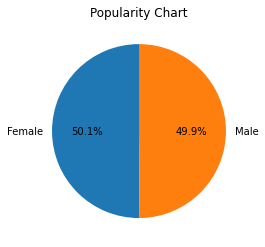


 or 



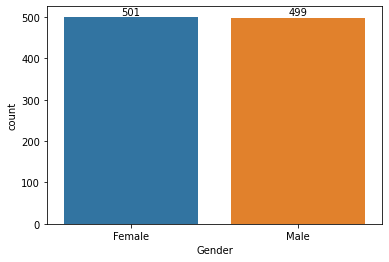

In [ ]:
num = S['Gender'].value_counts()
gender =['Female','Male']
plt.pie(num, labels = gender, autopct='%1.1f%%', startangle=90)
plt.title("Popularity Chart")
print(num)
plt.show()

print('\n', 'or','\n')
sns.countplot(x='Gender', data=S)
plt.text(0,num[0],round(num[0],2),ha="center",va="bottom")
plt.text(1,num[1],round(num[1],2),ha="center",va="bottom")
plt.show()

Answer 1:\
The supermarket popularity do not differ by much with gender as you can see from the Graph.Overall the female count is more by 2 hence we can say Female popularity is more.

###2)What does the customer rating look like and can you also comment on its distribution?

Number of rating above 8 is 304
Number of rating b/w 5-8 is 515
Number of rating below 5 is 174


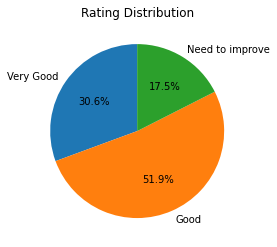

As for me Rating of above 8 is Very good, rating between 5-8 is average or good and rating of 
below 5 is Need improvement. You can see the percentage distribution of rating in pie chart and we get to know that 
Overall rating is Average or Good

 or 

We can also get the distribution of rating by mean, 25percntile and 75percentile as criteria, and when we plot a distribution plot we
get to see rating distribution as uniform 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


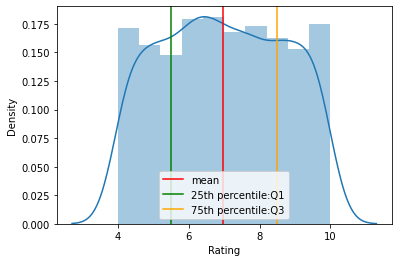

In [ ]:
r= S.Rating

x=[]
y=[]
z=[]
for i in r.dropna():
  if i > 8:
   x.append(i)
  elif 5 < i <=8:
    z.append(i)
  else:
   y.append(i)
p=[len(x),len(z),len(y)]
print("Number of rating above 8 is",len(x))
print("Number of rating b/w 5-8 is",len(z))
print("Number of rating below 5 is",len(y))
q=['Very Good','Good','Need to improve']
plt.pie(p, labels=q, autopct='%1.1f%%', startangle=90)
plt.title("Rating Distribution")
plt.show()
print('''As for me Rating of above 8 is Very good, rating between 5-8 is average or good and rating of 
below 5 is Need improvement. You can see the percentage distribution of rating in pie chart and we get to know that 
Overall rating is Average or Good''')


print('\n','or','\n')

sns.distplot(S['Rating'])
plt.axvline(x=np.mean(S['Rating']), color='red', label='mean')
plt.axvline(x=np.percentile(S['Rating'].dropna(),25),color='green', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(S['Rating'].dropna(),75),color='orange',label = '75th percentile:Q3' )
plt.legend()
print('''We can also get the distribution of rating by mean, 25percntile and 75percentile as criteria, and when we plot a distribution plot we
get to see rating distribution as uniform \n''')

Answer 2:\
Here we have interpreted two graphs one is based on assumed rating critera and the other with 25percentile, mean and 75percentile critera. In the assumed criteria we get to see rating is more for Good or average, where as in second critera the distribution is uniform.  

###3)What can you say about the aggregate sales across the branches?

A    340
B    332
C    328
Name: Branch, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(2, 332, '332')

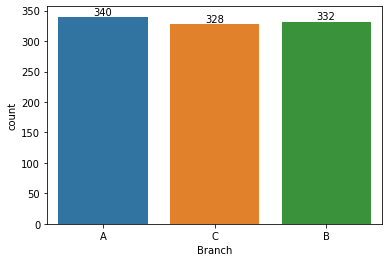

In [ ]:
sns.countplot(S['Branch'])
q = S['Branch'].value_counts()
print(q)
plt.text(0,q[0],round(q[0],2),ha="center",va="bottom")
plt.text(1,q[2],round(q[2],2),ha="center",va="bottom")
plt.text(2,q[1],round(q[1],2),ha="center",va="bottom")

Answer 3:\
As we can see from the graph there is no much difference in aggregate sales,but sales of bracnch A is slightly higer. 

###4)Which is the most popular payment method used by customers?

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(1, 344, '344')

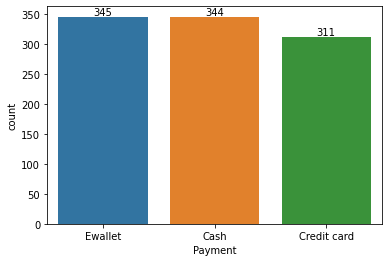

In [ ]:
sns.countplot(S['Payment'])
t= S['Payment'].value_counts()
print(t)
plt.text(0,t[0],round(t[0],2),ha="center",va="bottom")
plt.text(2,t[2],round(t[2],2),ha="center",va="bottom")
plt.text(1,t[1],round(t[1],2),ha="center",va="bottom")

Answer 4:\
As we can see Ewallet and Cash payment are nearly same, hence we can say Ewallet is more popular and Cash payment is also popular

###5)Does gross income affect customer ratings?

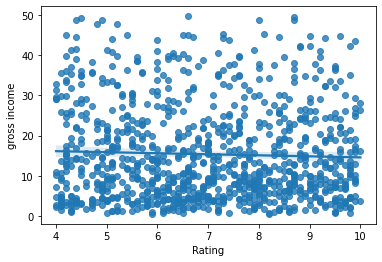

In [ ]:
sns.regplot(x=S['Rating'], y=S['gross income'], data=S)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


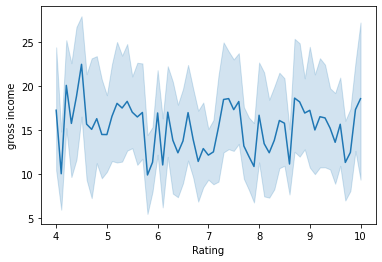

In [ ]:
sns.lineplot(S['Rating'].dropna(), S['gross income'])

Answer 5:\
Here we have plot two graphs from both the graph we can see that there is no clear relationship between 'gross income' and customer 'Rating'.
This is confirmed by the fact that the trendline is pretty flat in the first graph.

###6)Which is the most profitable branch?

Total Gross income: 
 Branch
A    5057.1605
B    5057.0320
C    5265.1765
Name: gross income, dtype: float64 
 Mean Gross income: 
 Branch
A    14.874001
B    15.232024
C    16.052367
Name: gross income, dtype: float64


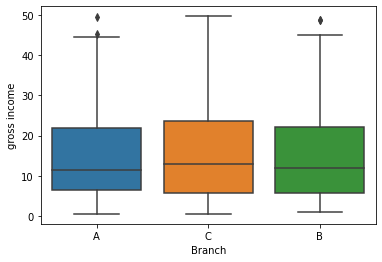

In [ ]:
x= S.groupby(["Branch"])['gross income'].sum()
y= S.groupby(["Branch"])['gross income'].mean()
print("Total Gross income:",'\n',x,'\n',"Mean Gross income:",'\n',y)
sns.boxplot(x=S['Branch'], y=S['gross income'])

Text(2, 15.232024096385542, '15.23')

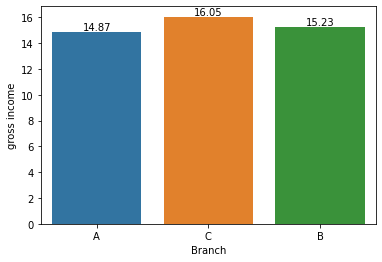

In [ ]:
sns.barplot(x=S['Branch'], y=S['gross income'], ci=None)
#for i in range(len(x)):
plt.text(0,y[0],round(y[0],2),ha="center",va="bottom")
plt.text(1,y[2],round(y[2],2),ha="center",va="bottom")
plt.text(2,y[1],round(y[1],2),ha="center",va="bottom")


Answer 6:\
From the two graphs plotted the gross income does not seem to vary by much for the different branches, but branch C has slightly higher income. 

###7)Create a boxplot between Gender and Gross income and explain the results?

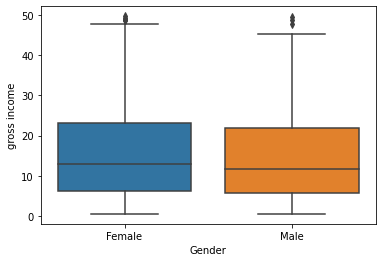

In [ ]:
sns.boxplot(x=S['Gender'], y=S['gross income'])

Answer 7:\
As we can see from the plot the female and male spend about the same amount as the gross income is similar for both, but gross income from female customers is slightly higher. 

###8)Can you see any time trend in gross income?

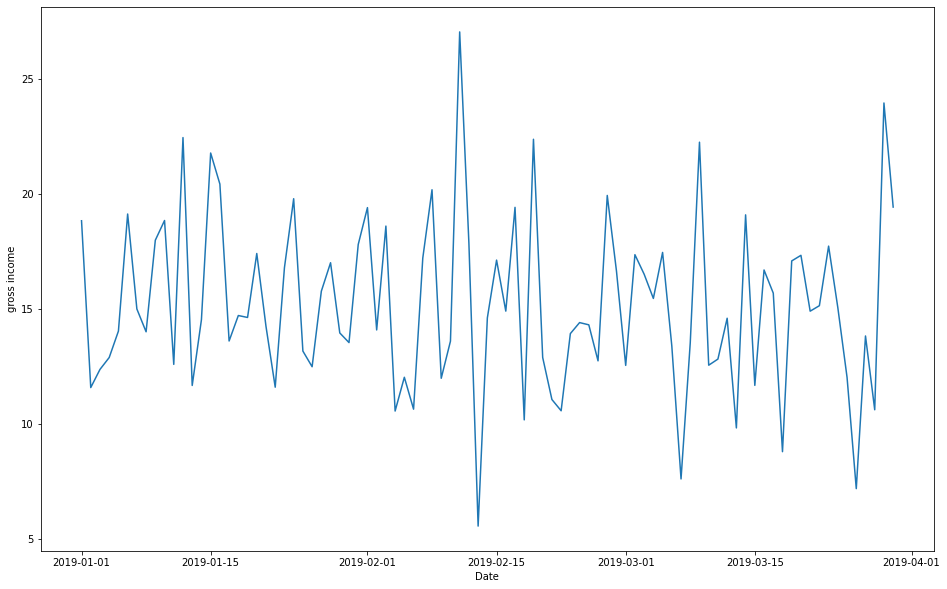

In [ ]:
plt.figure(figsize=(16,10))
sns.lineplot(x= S.groupby(S.Date).mean().index, y = S.groupby(S.Date).mean()['gross income'])

Answer 8:\
From the graph we can see that there is no trend in the 'gross income' with respect to the 'Date', we can observe that in some days gross income is pretty high and in some days pretty low.

###9)What is the spending pattern of both males and females, meaning in which category do they spend more?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


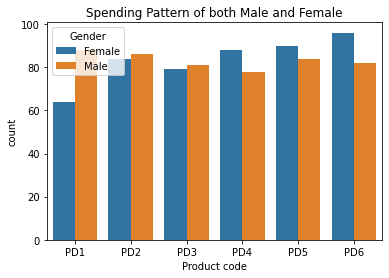

In [ ]:
plt.title('Spending Pattern of both Male and Female')
sns.countplot(S['Product code'], hue = S.Gender)

Answer 9:\
From the plot we can clearly see that Female customers spend more on PD6 that is Fashion accessories and Male customers spend more on PD1 that is Health and beauty.

###10)How many products are bought by customers?

10    119
1     112
4     109
7     102
5     102
6      98
9      92
2      91
3      90
8      85
Name: Quantity, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


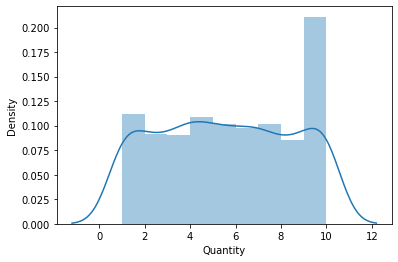

In [ ]:
Quant = S['Quantity'].dropna().value_counts()
print(Quant)
sns.distplot(S['Quantity'])

Answer 10:\
From the graph it is clearly vissible that most of the customers buy 10 quantity of products.

###11)Which day of the week has maximum sales?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


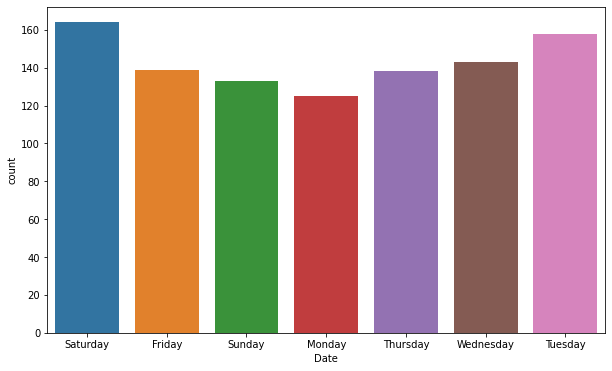

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(S['Date'].dt.day_name())

Answer 11:\
From the graph we can see that Saturday has the maximum sales

###12)Which hour of the day is the busiest?

Text(0.5, 1.0, 'Sales per Hour')

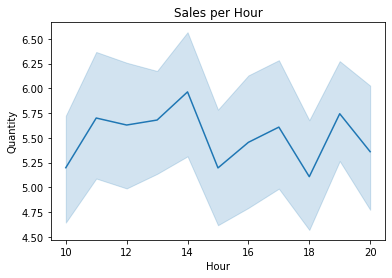

In [ ]:
S['Time'] = pd.to_datetime(S['Time'])
S['Hour'] = (S['Time']).dt.hour
S['Hour'].unique()
sns.lineplot(x="Hour",  y = 'Quantity',data =S).set_title("Sales per Hour")

Answer 12:\
From the graph peak is high at 14 hour that is 2pm.

###13)Which product line should the supermarket focus on?

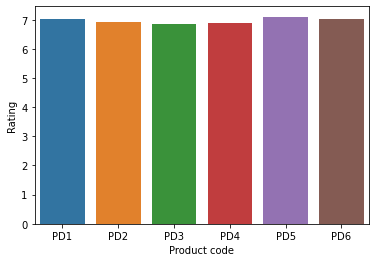

In [7]:
sns.barplot(x = S['Product code'], y = S['Rating'],ci=None)

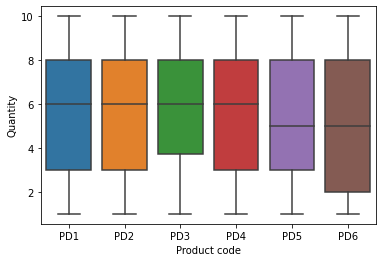

In [6]:
sns.boxplot(x = S['Product code'], y = S['Quantity'], data=S)

Answer 13:\
From the above two graph the rating distribution is similar to all products, but average quantity sold for PD5 and PD6 is low hence more focus on PD5 and PD6 that is Food and beverages & Fashion accessories.

###14)Which city should be chosen for expansion and which products should it focus on?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


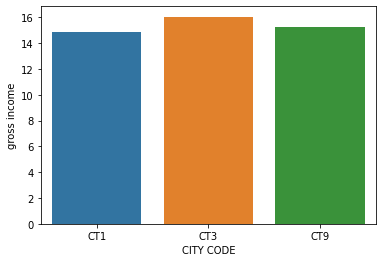

In [ ]:
sns.barplot(S['CITY CODE'],S['gross income'],ci=None)


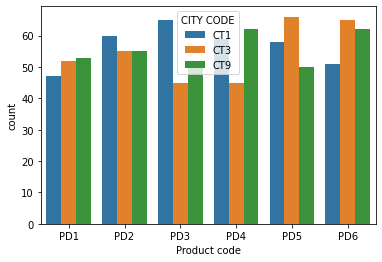

In [10]:
sns.countplot(x ='Product code', hue = "CITY CODE", data = S)

Answer 14:\
It is clear from the first graph that City code CT3 which is Naypyitaw is having more gross income, hence expansion can be done for CT3.\
From Second graph it is clear that PD5(Food and beverages) and PD6(Fashion accessories) are the most sold products for CT3 so it should focus on these products while expansion.
